In [1]:
from nltk.corpus import reuters
from nltk.tokenize import sent_tokenize, word_tokenize

import nltk
nltk.download("reuters")
nltk.download('punkt')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Categories
print(reuters.categories())

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [19]:
# Get all fileids associated with interest
interest_ids = reuters.fileids(categories = 'interest')

In [16]:
# Get article 
article = reuters.raw(fileids=reuters.fileids(categories='interest')[0])
print(article)

BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TENDER
  The Bundesbank accepted bids for 6.1
  billion marks at today's tender for a 28-day securities
  repurchase pact at a fixed rate of 3.80 pct, a central bank
  spokesman said.
      Banks, which bid for a total 12.2 billion marks liquidity,
  will be credited with the funds allocated today and must buy
  back securities pledged on May 6.
      Some 14.9 billion marks will drain from the market today as
  an earlier pact expires, so the Bundesbank is effectively
  withdrawing a net 8.1 billion marks from the market with
  today's allocation.
      A Bundesbank spokesman said in answer to enquiries that the
  withdrawal of funds did not reflect a tightening of credit
  policy, but was to be seen in the context of plentiful
  liquidity in the banking system.
      Banks held an average 59.3 billion marks at the Bundesbank
  over the first six days of the month, well clear of the likely
  April minimum reserve requirement of 51 billion mark

In [20]:
# get all raw stories
raw_stories = []
ids = []
for id in interest_ids:
    raw_stories.append(reuters.raw(id))
    ids.append(id)

In [21]:
# sentence tokenize stories
sentence_tokenized = [sent_tokenize(i) for i in raw_stories]

In [22]:
# word tokenize all sentences
word_tokenized = []

for story in sentence_tokenized:
    # get all for each article, which is already sentence tokenized
    words = []
    for sent in story:
        words = words + word_tokenize(sent)
    # append all words for each article to the word_tokenized list
    word_tokenized.append(words)

In [24]:
import pandas as pd
# Put everything into a DataFrame
reuters_interest = pd.DataFrame({'raw_stories': raw_stories,
                             'sentence_tokenized': sentence_tokenized,
                             'word_tokenized': word_tokenized
                            })
reuters_interest.index = ids

In [25]:
# Read into DataFrame
reuters_interest.head()

,raw_stories,sentence_tokenized,word_tokenized
test/14849,BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEND...,[BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEN...,"[BUNDESBANK, ALLOCATES, 6.1, BILLION, MARKS, I..."
test/14861,U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN ...,[U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN...,"[U.K., MONEY, MARKET, DEFICIT, FORECAST, AT, 2..."
test/14890,ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMIN...,[ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMI...,"[ECONOMIC, SPOTLIGHT, -, AUSTRALIAN, MARKETS, ..."
test/14919,U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\...,[U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE...,"[U.K., MONEY, MARKET, GIVEN, 53, MLN, STG, ASS..."
test/14964,U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG HE...,[U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG H...,"[U.K., MONEY, MARKET, GIVEN, FURTHER, 166, MLN..."


In [26]:
# What is the shape of the dataset?

print("Input data has {} rows and {} columns".format(len(reuters_interest), len(reuters_interest.columns)))

Input data has 478 rows and 3 columns


In [27]:
# How much missing data is there?

print("Number of null in raw_stories: {}".format(reuters_interest['raw_stories'].isnull().sum()))
print("Number of null in sentence_tokenized: {}".format(reuters_interest['sentence_tokenized'].isnull().sum()))
print("Number of null in word_tokenized: {}".format(reuters_interest['word_tokenized'].isnull().sum()))

Number of null in raw_stories: 0
Number of null in sentence_tokenized: 0
Number of null in word_tokenized: 0


In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

reuters_interest['raw_stories_cleaned'] = reuters_interest['raw_stories'].apply(lambda x: remove_punct(x))

reuters_interest.head()

,raw_stories,sentence_tokenized,word_tokenized,raw_stories_cleaned
test/14849,BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEND...,[BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEN...,"[BUNDESBANK, ALLOCATES, 6.1, BILLION, MARKS, I...",BUNDESBANK ALLOCATES 61 BILLION MARKS IN TENDE...
test/14861,U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN ...,[U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN...,"[U.K., MONEY, MARKET, DEFICIT, FORECAST, AT, 2...",UK MONEY MARKET DEFICIT FORECAST AT 250 MLN ST...
test/14890,ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMIN...,[ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMI...,"[ECONOMIC, SPOTLIGHT, -, AUSTRALIAN, MARKETS, ...",ECONOMIC SPOTLIGHT AUSTRALIAN MARKETS BOOMING...
test/14919,U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\...,[U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE...,"[U.K., MONEY, MARKET, GIVEN, 53, MLN, STG, ASS...",UK MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\n ...
test/14964,U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG HE...,[U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG H...,"[U.K., MONEY, MARKET, GIVEN, FURTHER, 166, MLN...",UK MONEY MARKET GIVEN FURTHER 166 MLN STG HELP...


In [30]:
import nltk

stopword = nltk.corpus.stopwords.words('english')# All English Stopwords

In [32]:
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

reuters_interest['raw_sentence_nostop'] = reuters_interest['sentence_tokenized'].apply(lambda x: remove_stopwords(x))
reuters_interest['raw_word_nostop'] = reuters_interest['word_tokenized'].apply(lambda x: remove_stopwords(x))
reuters_interest.head()

,raw_stories,sentence_tokenized,word_tokenized,raw_stories_cleaned,raw_sentence_nostop,raw_word_nostop
test/14849,BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEND...,[BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEN...,"[BUNDESBANK, ALLOCATES, 6.1, BILLION, MARKS, I...",BUNDESBANK ALLOCATES 61 BILLION MARKS IN TENDE...,[BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEN...,"[BUNDESBANK, ALLOCATES, 6.1, BILLION, MARKS, I..."
test/14861,U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN ...,[U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN...,"[U.K., MONEY, MARKET, DEFICIT, FORECAST, AT, 2...",UK MONEY MARKET DEFICIT FORECAST AT 250 MLN ST...,[U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN...,"[U.K., MONEY, MARKET, DEFICIT, FORECAST, AT, 2..."
test/14890,ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMIN...,[ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMI...,"[ECONOMIC, SPOTLIGHT, -, AUSTRALIAN, MARKETS, ...",ECONOMIC SPOTLIGHT AUSTRALIAN MARKETS BOOMING...,[ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMI...,"[ECONOMIC, SPOTLIGHT, -, AUSTRALIAN, MARKETS, ..."
test/14919,U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\...,[U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE...,"[U.K., MONEY, MARKET, GIVEN, 53, MLN, STG, ASS...",UK MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\n ...,[U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE...,"[U.K., MONEY, MARKET, GIVEN, 53, MLN, STG, ASS..."
test/14964,U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG HE...,[U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG H...,"[U.K., MONEY, MARKET, GIVEN, FURTHER, 166, MLN...",UK MONEY MARKET GIVEN FURTHER 166 MLN STG HELP...,[U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG H...,"[U.K., MONEY, MARKET, GIVEN, FURTHER, 166, MLN..."


In [34]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

reuters_interest['raw_word_stemmed'] = reuters_interest['raw_word_nostop'].apply(lambda x: stemming(x))
reuters_interest['raw_sentence_stemmed'] = reuters_interest['raw_sentence_nostop'].apply(lambda x: stemming(x))

reuters_interest.head()

,raw_stories,sentence_tokenized,word_tokenized,raw_stories_cleaned,raw_sentence_nostop,raw_word_nostop,raw_word_stemmed,raw_sentence_stemmed
test/14849,BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEND...,[BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEN...,"[BUNDESBANK, ALLOCATES, 6.1, BILLION, MARKS, I...",BUNDESBANK ALLOCATES 61 BILLION MARKS IN TENDE...,[BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEN...,"[BUNDESBANK, ALLOCATES, 6.1, BILLION, MARKS, I...","[bundesbank, alloc, 6.1, billion, mark, IN, te...",[bundesbank allocates 6.1 billion marks in ten...
test/14861,U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN ...,[U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN...,"[U.K., MONEY, MARKET, DEFICIT, FORECAST, AT, 2...",UK MONEY MARKET DEFICIT FORECAST AT 250 MLN ST...,[U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN...,"[U.K., MONEY, MARKET, DEFICIT, FORECAST, AT, 2...","[u.k., money, market, deficit, forecast, AT, 2...",[u.k. money market deficit forecast at 250 mln...
test/14890,ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMIN...,[ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMI...,"[ECONOMIC, SPOTLIGHT, -, AUSTRALIAN, MARKETS, ...",ECONOMIC SPOTLIGHT AUSTRALIAN MARKETS BOOMING...,[ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMI...,"[ECONOMIC, SPOTLIGHT, -, AUSTRALIAN, MARKETS, ...","[econom, spotlight, -, australian, market, boo...",[economic spotlight - australian markets boomi...
test/14919,U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\...,[U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE...,"[U.K., MONEY, MARKET, GIVEN, 53, MLN, STG, ASS...",UK MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\n ...,[U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE...,"[U.K., MONEY, MARKET, GIVEN, 53, MLN, STG, ASS...","[u.k., money, market, given, 53, mln, stg, ass...",[u.k. money market given 53 mln stg assistance...
test/14964,U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG HE...,[U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG H...,"[U.K., MONEY, MARKET, GIVEN, FURTHER, 166, MLN...",UK MONEY MARKET GIVEN FURTHER 166 MLN STG HELP...,[U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG H...,"[U.K., MONEY, MARKET, GIVEN, FURTHER, 166, MLN...","[u.k., money, market, given, further, 166, mln...",[u.k. money market given further 166 mln stg h...


In [35]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

reuters_interest['raw_sentence_lemmatized'] = reuters_interest['raw_sentence_nostop'].apply(lambda x: lemmatizing(x))
reuters_interest['raw_word_lemmatized'] = reuters_interest['raw_word_nostop'].apply(lambda x: lemmatizing(x))

reuters_interest.head()

,raw_stories,sentence_tokenized,word_tokenized,raw_stories_cleaned,raw_sentence_nostop,raw_word_nostop,raw_word_stemmed,raw_sentence_stemmed,raw_sentence_lemmatized,raw_word_lemmatized
test/14849,BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEND...,[BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEN...,"[BUNDESBANK, ALLOCATES, 6.1, BILLION, MARKS, I...",BUNDESBANK ALLOCATES 61 BILLION MARKS IN TENDE...,[BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEN...,"[BUNDESBANK, ALLOCATES, 6.1, BILLION, MARKS, I...","[bundesbank, alloc, 6.1, billion, mark, IN, te...",[bundesbank allocates 6.1 billion marks in ten...,[BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TEN...,"[BUNDESBANK, ALLOCATES, 6.1, BILLION, MARKS, I..."
test/14861,U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN ...,[U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN...,"[U.K., MONEY, MARKET, DEFICIT, FORECAST, AT, 2...",UK MONEY MARKET DEFICIT FORECAST AT 250 MLN ST...,[U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN...,"[U.K., MONEY, MARKET, DEFICIT, FORECAST, AT, 2...","[u.k., money, market, deficit, forecast, AT, 2...",[u.k. money market deficit forecast at 250 mln...,[U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN...,"[U.K., MONEY, MARKET, DEFICIT, FORECAST, AT, 2..."
test/14890,ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMIN...,[ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMI...,"[ECONOMIC, SPOTLIGHT, -, AUSTRALIAN, MARKETS, ...",ECONOMIC SPOTLIGHT AUSTRALIAN MARKETS BOOMING...,[ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMI...,"[ECONOMIC, SPOTLIGHT, -, AUSTRALIAN, MARKETS, ...","[econom, spotlight, -, australian, market, boo...",[economic spotlight - australian markets boomi...,[ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMI...,"[ECONOMIC, SPOTLIGHT, -, AUSTRALIAN, MARKETS, ..."
test/14919,U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\...,[U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE...,"[U.K., MONEY, MARKET, GIVEN, 53, MLN, STG, ASS...",UK MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\n ...,[U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE...,"[U.K., MONEY, MARKET, GIVEN, 53, MLN, STG, ASS...","[u.k., money, market, given, 53, mln, stg, ass...",[u.k. money market given 53 mln stg assistance...,[U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE...,"[U.K., MONEY, MARKET, GIVEN, 53, MLN, STG, ASS..."
test/14964,U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG HE...,[U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG H...,"[U.K., MONEY, MARKET, GIVEN, FURTHER, 166, MLN...",UK MONEY MARKET GIVEN FURTHER 166 MLN STG HELP...,[U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG H...,"[U.K., MONEY, MARKET, GIVEN, FURTHER, 166, MLN...","[u.k., money, market, given, further, 166, mln...",[u.k. money market given further 166 mln stg h...,[U.K. MONEY MARKET GIVEN FURTHER 166 MLN STG H...,"[U.K., MONEY, MARKET, GIVEN, FURTHER, 166, MLN..."


In [39]:
# We save the file as CSV 
reuters_interest.to_csv("Resources/reuters_interest_cleaned.csv")

In [42]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100) # To extend column width

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("Resources/reuters_interest_cleaned.csv")


In [43]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [44]:

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['raw_stories'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(478, 4440)
['', '005', '01', '010', '02', '02775892', '02793973', '03', '0304', '037', '04', '05', '050', '06', '060', '06820', '0685863', '0686469', '06875', '07', '0700', '071', '0730', '075', '08', '0800', '0830', '09', '090', '0930', '1', '10', '100', '1000', '10010', '1001032', '10014', '1002632', '100432', '1005', '10091028', '101', '10114', '101181', '1011932', '1012', '101232', '101250', '101316', '101332', '101516', '101732', '102', '1026', '103', '1030', '1034', '1038', '1040', '104179', '105', '10516', '10549', '1058', '1059', '106', '1065', '107', '10716', '1078', '10916', '10978', '109billion', '10day', '10month', '10year', '11', '110', '1100', '111', '1114', '112', '1125', '112673', '112705', '113', '1134', '114', '1143', '1145', '115', '1152', '11547', '116', '117', '1179', '118', '1187', '119', '11day', '12', '120', '1200', '120150', '1205', '121', '1212', '1218', '122', '123', '1240', '124150', '125', '1250', '125150', '1255', '129', '12day', '12month', '13', '1300', 

In [45]:
X_counts

<478x4440 sparse matrix of type '<class 'numpy.int64'>'
	with 31639 stored elements in Compressed Sparse Row format>

In [46]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names())
X_counts_df.head(10)

,,005,01,010,02,02775892,02793973,03,0304,037,...,youd,young,your,zealand,zentralbank,zentralsparkass,zero,zeropoint,zoet,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2),analyzer=clean_text) # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(data['raw_stories'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(478, 4440)
['', '005', '01', '010', '02', '02775892', '02793973', '03', '0304', '037', '04', '05', '050', '06', '060', '06820', '0685863', '0686469', '06875', '07', '0700', '071', '0730', '075', '08', '0800', '0830', '09', '090', '0930', '1', '10', '100', '1000', '10010', '1001032', '10014', '1002632', '100432', '1005', '10091028', '101', '10114', '101181', '1011932', '1012', '101232', '101250', '101316', '101332', '101516', '101732', '102', '1026', '103', '1030', '1034', '1038', '1040', '104179', '105', '10516', '10549', '1058', '1059', '106', '1065', '107', '10716', '1078', '10916', '10978', '109billion', '10day', '10month', '10year', '11', '110', '1100', '111', '1114', '112', '1125', '112673', '112705', '113', '1134', '114', '1143', '1145', '115', '1152', '11547', '116', '117', '1179', '118', '1187', '119', '11day', '12', '120', '1200', '120150', '1205', '121', '1212', '1218', '122', '123', '1240', '124150', '125', '1250', '125150', '1255', '129', '12day', '12month', '13', '1300', 

In [48]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=ngram_vect.get_feature_names())
X_counts_df.head(10)

,,005,01,010,02,02775892,02793973,03,0304,037,...,youd,young,your,zealand,zentralbank,zentralsparkass,zero,zeropoint,zoet,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['raw_stories'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(478, 4440)
['', '005', '01', '010', '02', '02775892', '02793973', '03', '0304', '037', '04', '05', '050', '06', '060', '06820', '0685863', '0686469', '06875', '07', '0700', '071', '0730', '075', '08', '0800', '0830', '09', '090', '0930', '1', '10', '100', '1000', '10010', '1001032', '10014', '1002632', '100432', '1005', '10091028', '101', '10114', '101181', '1011932', '1012', '101232', '101250', '101316', '101332', '101516', '101732', '102', '1026', '103', '1030', '1034', '1038', '1040', '104179', '105', '10516', '10549', '1058', '1059', '106', '1065', '107', '10716', '1078', '10916', '10978', '109billion', '10day', '10month', '10year', '11', '110', '1100', '111', '1114', '112', '1125', '112673', '112705', '113', '1134', '114', '1143', '1145', '115', '1152', '11547', '116', '117', '1179', '118', '1187', '119', '11day', '12', '120', '1200', '120150', '1205', '121', '1212', '1218', '122', '123', '1240', '124150', '125', '1250', '125150', '1255', '129', '12day', '12month', '13', '1300', 

In [50]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
X_tfidf_df.head(10)

,,005,01,010,02,02775892,02793973,03,0304,037,...,youd,young,your,zealand,zentralbank,zentralsparkass,zero,zeropoint,zoet,zone
0,0.013977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.026790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.007164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.022347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.030546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.057583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.046117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.021200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.016670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])

               005   01  010   02  02775892  02793973   03  0304  037  ...  \
0    0.013977  0.0  0.0  0.0  0.0       0.0       0.0  0.0   0.0  0.0  ...   
1    0.026790  0.0  0.0  0.0  0.0       0.0       0.0  0.0   0.0  0.0  ...   
2    0.007164  0.0  0.0  0.0  0.0       0.0       0.0  0.0   0.0  0.0  ...   
3    0.030860  0.0  0.0  0.0  0.0       0.0       0.0  0.0   0.0  0.0  ...   
4    0.022347  0.0  0.0  0.0  0.0       0.0       0.0  0.0   0.0  0.0  ...   
..        ...  ...  ...  ...  ...       ...       ...  ...   ...  ...  ...   
473  0.024740  0.0  0.0  0.0  0.0       0.0       0.0  0.0   0.0  0.0  ...   
474  0.031266  0.0  0.0  0.0  0.0       0.0       0.0  0.0   0.0  0.0  ...   
475  0.056588  0.0  0.0  0.0  0.0       0.0       0.0  0.0   0.0  0.0  ...   
476  0.048615  0.0  0.0  0.0  0.0       0.0       0.0  0.0   0.0  0.0  ...   
477  0.049012  0.0  0.0  0.0  0.0       0.0       0.0  0.0   0.0  0.0  ...   

         youd  young  your  zealand  zentralbank  zentralsparka

In [52]:
# Create feature for text message length and % of punctuation in text
import string

# Function to calculate length of message excluding space
data['body_len'] = data['raw_stories'].apply(lambda x: len(x) - x.count(" "))

data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['raw_stories'].apply(lambda x: count_punct(x))

data.head()

,Unnamed: 0,raw_stories,sentence_tokenized,word_tokenized,raw_stories_cleaned,raw_sentence_nostop,raw_word_nostop,raw_word_stemmed,raw_sentence_stemmed,raw_sentence_lemmatized,raw_word_lemmatized,body_len,punct%
0,test/14849,BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TENDER\n The Bundesbank accepted bids for 6.1\n bill...,"[""BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TENDER\n The Bundesbank accepted bids for 6.1\n bi...","['BUNDESBANK', 'ALLOCATES', '6.1', 'BILLION', 'MARKS', 'IN', 'TENDER', 'The', 'Bundesbank', 'acc...",BUNDESBANK ALLOCATES 61 BILLION MARKS IN TENDER\n The Bundesbank accepted bids for 61\n billio...,"[""BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TENDER\n The Bundesbank accepted bids for 6.1\n bi...","['BUNDESBANK', 'ALLOCATES', '6.1', 'BILLION', 'MARKS', 'IN', 'TENDER', 'The', 'Bundesbank', 'acc...","['bundesbank', 'alloc', '6.1', 'billion', 'mark', 'IN', 'tender', 'the', 'bundesbank', 'accept',...","[""bundesbank allocates 6.1 billion marks in tender\n the bundesbank accepted bids for 6.1\n bi...","[""BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TENDER\n The Bundesbank accepted bids for 6.1\n bi...","['BUNDESBANK', 'ALLOCATES', '6.1', 'BILLION', 'MARKS', 'IN', 'TENDER', 'The', 'Bundesbank', 'acc...",1349,2.7
1,test/14861,U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN STG\n The Bank of England said it forecast a\n s...,['U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN STG\n The Bank of England said it forecast a\n ...,"['U.K.', 'MONEY', 'MARKET', 'DEFICIT', 'FORECAST', 'AT', '250', 'MLN', 'STG', 'The', 'Bank', 'of...",UK MONEY MARKET DEFICIT FORECAST AT 250 MLN STG\n The Bank of England said it forecast a\n sho...,['U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN STG\n The Bank of England said it forecast a\n ...,"['U.K.', 'MONEY', 'MARKET', 'DEFICIT', 'FORECAST', 'AT', '250', 'MLN', 'STG', 'The', 'Bank', 'En...","['u.k.', 'money', 'market', 'deficit', 'forecast', 'AT', '250', 'mln', 'stg', 'the', 'bank', 'en...",['u.k. money market deficit forecast at 250 mln stg\n the bank of england said it forecast a\n ...,['U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN STG\n The Bank of England said it forecast a\n ...,"['U.K.', 'MONEY', 'MARKET', 'DEFICIT', 'FORECAST', 'AT', '250', 'MLN', 'STG', 'The', 'Bank', 'En...",486,2.5
2,test/14890,ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMING\n Australian markets are booming as foreign\n ...,['ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMING\n Australian markets are booming as foreign\n...,"['ECONOMIC', 'SPOTLIGHT', '-', 'AUSTRALIAN', 'MARKETS', 'BOOMING', 'Australian', 'markets', 'are...",ECONOMIC SPOTLIGHT AUSTRALIAN MARKETS BOOMING\n Australian markets are booming as foreign\n f...,['ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMING\n Australian markets are booming as foreign\n...,"['ECONOMIC', 'SPOTLIGHT', '-', 'AUSTRALIAN', 'MARKETS', 'BOOMING', 'Australian', 'markets', 'boo...","['econom', 'spotlight', '-', 'australian', 'market', 'boom', 'australian', 'market', 'boom', 'fo...",['economic spotlight - australian markets booming\n australian markets are booming as foreign\n...,['ECONOMIC SPOTLIGHT - AUSTRALIAN MARKETS BOOMING\n Australian markets are booming as foreign\n...,"['ECONOMIC', 'SPOTLIGHT', '-', 'AUSTRALIAN', 'MARKETS', 'BOOMING', 'Australian', 'market', 'boom...",3972,3.0
3,test/14919,U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\n The Bank of England said it provided the\n mon...,['U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\n The Bank of England said it provided the\n m...,"['U.K.', 'MONEY', 'MARKET', 'GIVEN', '53', 'MLN', 'STG', 'ASSISTANCE', 'The', 'Bank', 'of', 'Eng...",UK MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\n The Bank of England said it provided the\n money...,['U.K. MONEY MARKET GIVEN 53 MLN STG ASSISTANCE\n The Bank of England said it provided the\n m...,"['U.K.', 'MONEY', 'MARKET', 'GIVEN', '53', 'MLN', 'STG', 'ASSISTANCE', 'The', 'Bank', 'England',...","['u.k.', 'money', 'market', 'given', '53', 'mln', 'stg', 'assist', 'the', 'bank', 'england', 'sa...",['u.k

In [53]:
#For Visualizing to check if message body length and % of punctuation is good feature or not.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

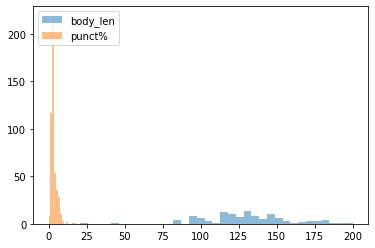

In [59]:
bins = np.linspace(0, 200, 40)
bins_2 = np.linspace(0, 50, 40)
plt.hist(data['body_len'], bins, alpha=0.5, label='body_len' )
plt.hist(data['punct%'], bins_2, alpha=0.5, label = 'punct%')
plt.legend(loc='upper left')
plt.show()

# Building ML Classifiers:Model Selection Random Forest with GridSearchCV

In [60]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['raw_stories'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['raw_stories'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,4430,4431,4432,4433,4434,4435,4436,4437,4438,4439
0,1349,2.7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,486,2.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3972,3.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,363,2.8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,448,3.3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# For CountVectorizer
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=2, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_count_feat, data['raw_stories'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

C:\Users\louis\Anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
1,1.309749,0.006249,0.186168,0.004213,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.075314,0.079498,0.077406,0.002092,1
2,2.556488,0.022425,0.295355,0.035960,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.075314,0.079498,0.077406,0.002092,1
4,1.978197,0.038051,0.196479,0.011804,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.075314,0.079498,0.077406,0.002092,1
5,4.285632,0.082256,0.439131,0.008670,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.075314,0.079498,0.077406,0.002092,1
6,0.248322,0.007917,0.078047,0.006803,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.075314,0.079498,0.077406,0.002092,1


In [65]:
# For TF_IDFVectorizer
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=2, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_tfidf_feat, data['raw_stories'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

C:\Users\louis\Anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
1,1.337744,0.005016,0.142222,0.007337,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.075314,0.079498,0.077406,0.002092,1
2,2.744876,0.154515,0.214230,0.007229,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.075314,0.079498,0.077406,0.002092,1
4,2.038689,0.109010,0.147044,0.006897,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.075314,0.079498,0.077406,0.002092,1
5,4.149372,0.052688,0.267343,0.008278,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.075314,0.079498,0.077406,0.002092,1
6,0.252295,0.003687,0.068531,0.006112,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.075314,0.079498,0.077406,0.002092,1
